In [6]:
import os

os.chdir('/content')
CODE_DIR = 'idinvert'
if not os.path.exists(CODE_DIR):
  !git clone https://github.com/weihaox/TediGAN.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')
MODEL_DIR = os.path.join('idinvert_pytorch', 'models', 'pretrain')
os.makedirs(MODEL_DIR, exist_ok=True)

!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

# download pretrained stylegan and encoder
!wget https://mycuhk-my.sharepoint.com/:u:/g/personal/1155082926_link_cuhk_edu_hk/EXqix_JIEgtLl1FXI4uCkr8B5GPaiJyiLXL6cFbdcIKqEA?e=WYesel\&download\=1 -O $MODEL_DIR/styleganinv_ffhq256_encoder.pth  --quiet
!wget https://mycuhk-my.sharepoint.com/:u:/g/personal/1155082926_link_cuhk_edu_hk/EbuzMQ3ZLl1AqvKJzeeBq7IBoQD-C1LfMIC8USlmOMPt3Q?e=CMXn8W\&download\=1 -O $MODEL_DIR/styleganinv_ffhq256_generator.pth  --quiet
!wget https://mycuhk-my.sharepoint.com/:u:/g/personal/1155082926_link_cuhk_edu_hk/EQJUz9DInbxEnp0aomkGGzAB5b3ZZbtsOA-TXct9E4ONqA?e=smtO0T\&download\=1 -O $MODEL_DIR/vgg16.pth  --quiet
!nvidia-smi


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-bn3cqem0
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-bn3cqem0
  Created wheel for clip: filename=clip-1.0-cp37-none-any.whl size=1368688 sha256=f883ba7321fbd871e0e9a74e46f9044a6cf4b06cf960443b49dafb701d800efa
  Stored in directory: /tmp/pip-ephem-wheel-cache-5wtn3vr7/wheels/79/51/d7/69f91d37121befe21d9c52332e04f592e17d1cabc7319b3e09
Successfully built clip
Tue Mar  9 13:02:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|====================

In [10]:
%cd idinvert_pytorch
%ls

app.py  examples/  invert.py  models/  utils/


In [ ]:
model='styleganinv_ffhq256'#@param {type:"string"}
image='examples/test.list'#@param {type:"string"}
description='he is old' #@param {type:"string"}
loss_weight_clip=2.0 #@param {type:"number"}
learning_rate=0.01 #@param {type:"number"}
num_iterations=200 #@param {type:"number"}
reconstruction_loss_weight=1.0 #@param {type:"number"}


In [12]:
!python invert.py --mode='man' --description='he is old'

Log file `results/inversion/test/inversion.log` has already existed!
Would you like to overwrite it (Y/N): Y
[2021-03-09 13:06:02,656][WARNING] Overwriting log file `results/inversion/test/inversion.log`!
[2021-03-09 13:06:02,656][INFO] Loading model.
[2021-03-09 13:06:06,404][INFO] Build network for module `generator` in model `styleganinv_ffhq256`.
[2021-03-09 13:06:06,666][INFO] Loading pytorch weights from `models/pretrain/styleganinv_ffhq256_generator.pth`.
[2021-03-09 13:06:06,969][INFO] Successfully loaded!
[2021-03-09 13:06:07,013][INFO] Current `lod` is 0.0.
[2021-03-09 13:06:07,013][INFO] Build network for module `encoder` in model `styleganinv_ffhq256`.
[2021-03-09 13:06:08,415][INFO] Loading pytorch weights from `models/pretrain/styleganinv_ffhq256_encoder.pth`.
[2021-03-09 13:06:10,241][INFO] Successfully loaded!
[2021-03-09 13:06:10,680][INFO] Loading image list.
[2021-03-09 13:06:10,680][INFO] Start inversion.
  0% 0/1 [00:00<?, ?it/s]
  0% 0/200 [00:00<?, ?it/s]
loss_pi

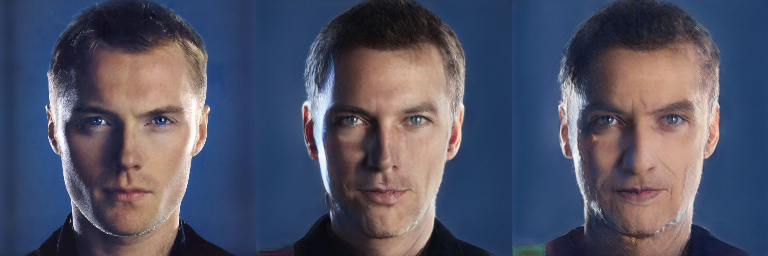

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
original=cv2.imread('results/inversion/test/142_ori.png')
inversion=cv2.imread('results/inversion/test/142_enc.png')
manipulation=cv2.imread('results/inversion/test/142_inv.png')
result = np.hstack([original,inversion,manipulation])
cv2_imshow(result)